<a href="https://colab.research.google.com/github/stephenchen0814/04-LinearReg_Salary/blob/main/Rolling_Reg_Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [9]:
data = pd.read_csv("Rolling_Reg_Car_Sales.csv")
data.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


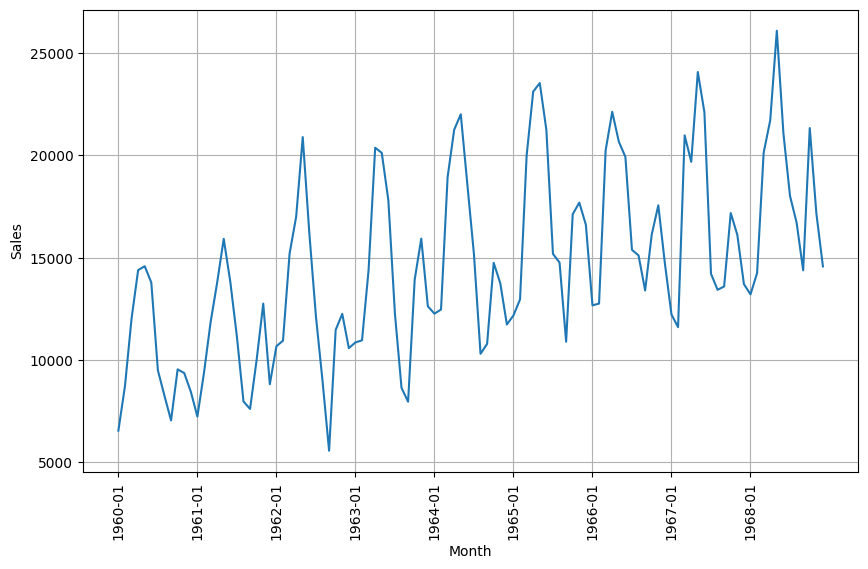

In [10]:
plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Sales")

plt.plot(data['Month'], data['Sales'])
plt.xticks(data['Month'][::12],  rotation='vertical')
plt.grid()
plt.show()

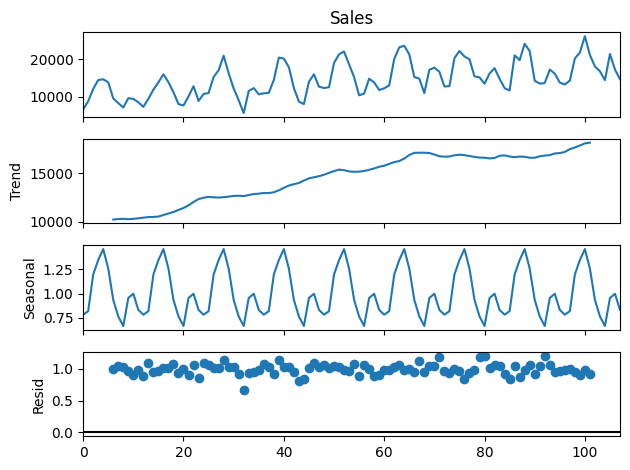

In [11]:
decom=seasonal_decompose(data.iloc[:,1],model='multiplicative', period=12)
decom.plot()
plt.show()

In [12]:
X,y=[], []
lag=18
for i in range(len(data)-lag-1):
  X.append(data.iloc[i:i+lag,1])
  y.append(data.iloc[i+lag,1])
X=np.squeeze(X)
y=np.squeeze(y)
X[0], y[0]

(array([ 6550,  8728, 12026, 14395, 14587, 13791,  9498,  8251,  7049,
         9545,  9364,  8456,  7237,  9374, 11837, 13784, 15926, 13821]),
 np.int64(11143))

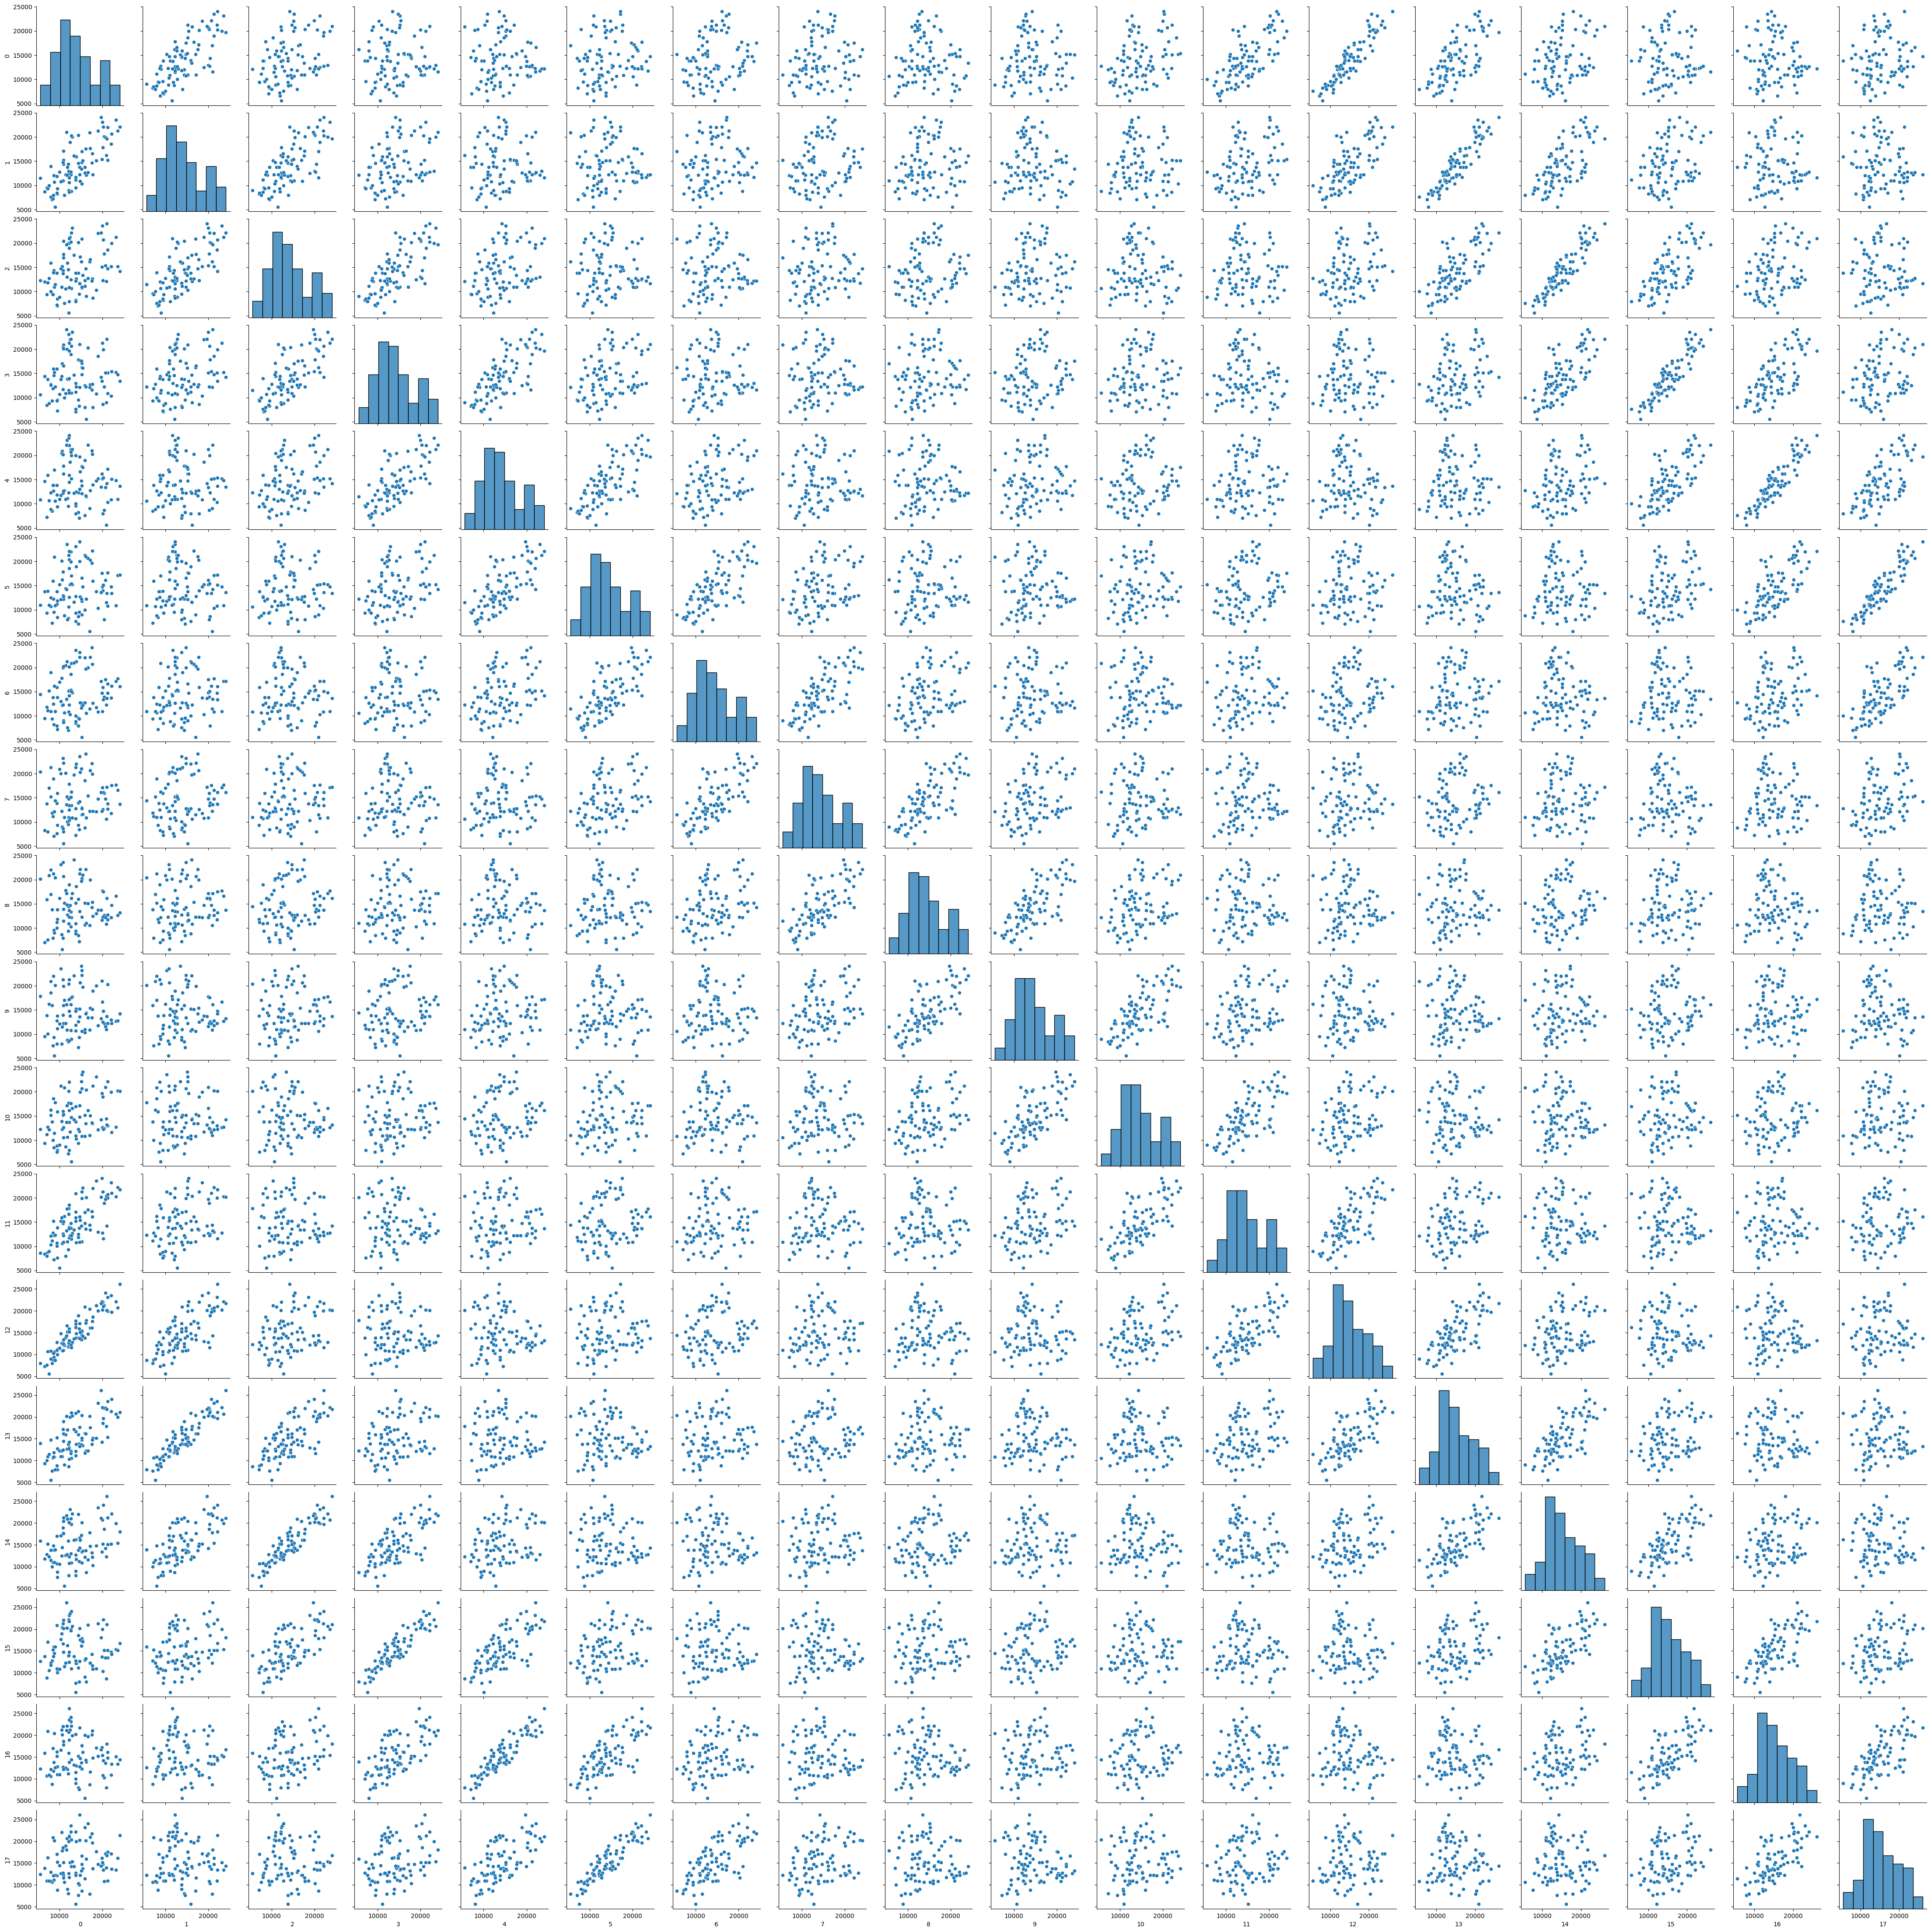

In [13]:
df=pd.DataFrame(X)
sns.pairplot(data=df)

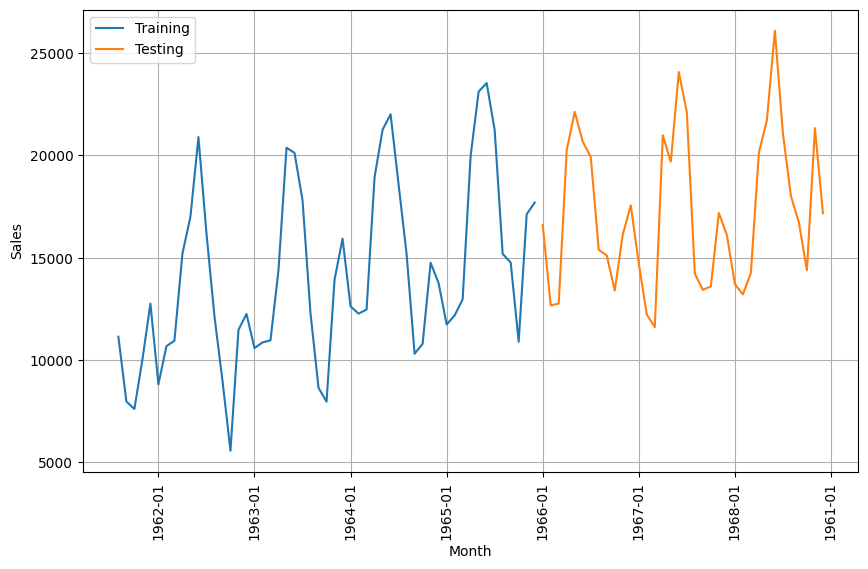

In [14]:
split_idx=36
x_train, y_train, x_test, y_test=X[:-split_idx], y[:-split_idx], X[-split_idx:], y[-split_idx:]

plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Sales")

plt.plot(data['Month'][lag+1:-split_idx],y_train, label='Training')
plt.plot(data['Month'][-split_idx:],y_test, label='Testing')
plt.xticks(data['Month'][lag-6::12],  rotation='vertical')
plt.legend()
plt.grid()
plt.show()

In [15]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [16]:
predictingset=[x for x in x_train[-1]]
y_pred=[]
for i in range(len(x_test)):
    pred=regr.predict([predictingset])
    y_pred.append(pred[0])
    predictingset.append(pred[0])
    predictingset=predictingset[1:]
print(y_pred)

[np.float64(15018.112028191057), np.float64(13538.282682507395), np.float64(13260.491166371952), np.float64(14180.386064998247), np.float64(22073.48053116122), np.float64(25168.432537802546), np.float64(25299.164753169658), np.float64(22644.301546640185), np.float64(16599.44537614312), np.float64(15232.192158422788), np.float64(14090.157490945547), np.float64(16958.20465804314), np.float64(17918.234633746266), np.float64(13475.546687326778), np.float64(15558.675174989612), np.float64(14810.955989395838), np.float64(24153.223745036586), np.float64(27403.565966096132), np.float64(26714.65669218992), np.float64(24543.80408656253), np.float64(17148.530419680115), np.float64(16799.59960102802), np.float64(15947.148195996118), np.float64(18290.380323433077), np.float64(19250.60328462295), np.float64(15014.99805314562), np.float64(15992.59766957524), np.float64(17312.79970320892), np.float64(24740.850882176623), np.float64(30673.33127349805), np.float64(27578.76942362466), np.float64(26513.88

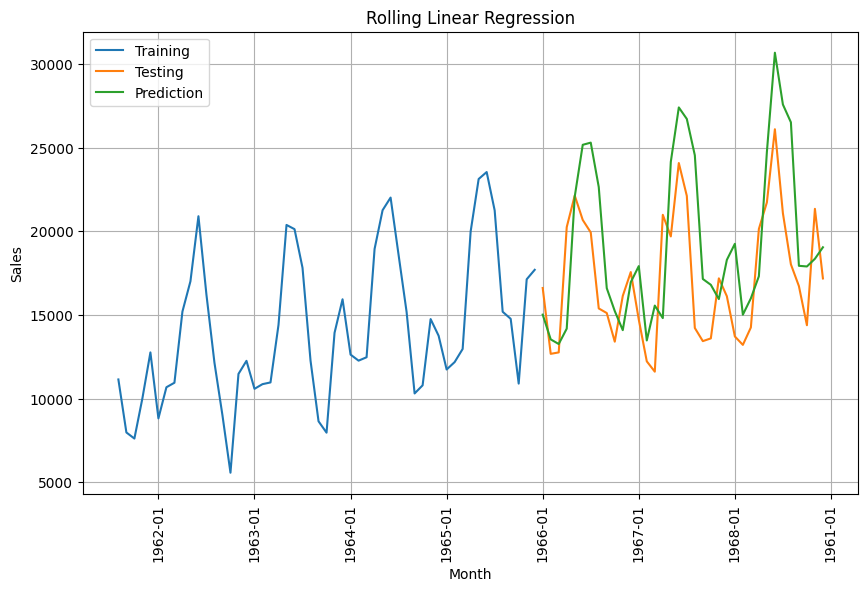

In [17]:
plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Sales")

plt.plot(data['Month'][lag+1:-split_idx],y_train, label='Training')
plt.plot(data['Month'][-split_idx:],y_test, label='Testing')
plt.plot(data['Month'][-split_idx:],y_pred, label='Prediction')
plt.xticks(data['Month'][lag-6::12],  rotation='vertical')
plt.legend()
plt.title('Rolling Linear Regression')
plt.grid()
plt.show()

In [18]:
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

Coefficient of determination: -0.26
Test RMSE: 4156.733


In [19]:
y_hat_rm = data.copy()
ma_window = 4
y_hat_rm['RollingMean'] = data['Sales'].rolling(ma_window).mean()
y_hat_rm.dropna(inplace=True)
y_hat_rm

,Month,Sales,RollingMean
3,1960-04,14395,10424.75
4,1960-05,14587,12434.00
5,1960-06,13791,13699.75
6,1960-07,9498,13067.75
7,1960-08,8251,11531.75
...,...,...,...
103,1968-08,16722,20482.25
104,1968-09,14385,17553.75
105,1968-10,21342,17618.25
106,1968-11,17180,17407.25


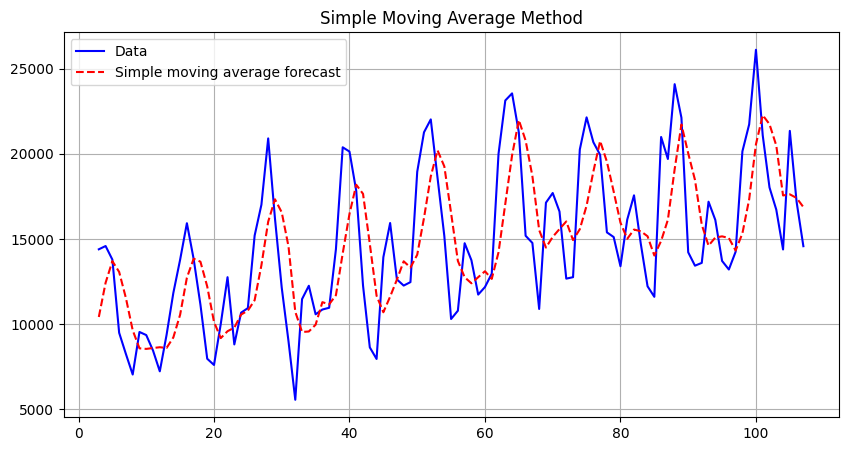

In [20]:
plt.figure(figsize=(10,5))

plt.plot(y_hat_rm['Sales'],label='Data',color='blue')
plt.plot(y_hat_rm['RollingMean'], label='Simple moving average forecast',linestyle='--', color='red')
plt.legend()
plt.title('Simple Moving Average Method')
plt.grid()
plt.show()

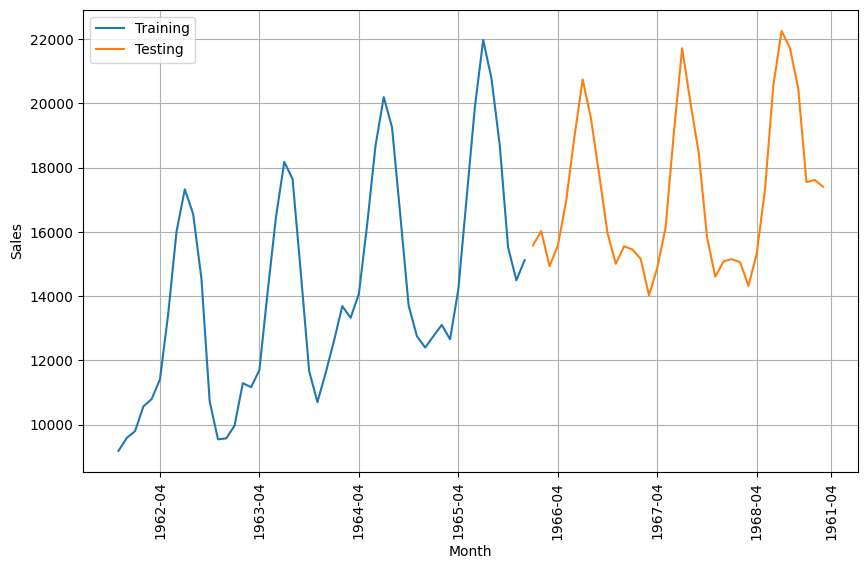

In [21]:
X,y=[], []
lag=18
for i in range(len(y_hat_rm)-lag-1):
  X.append(y_hat_rm.iloc[i:i+lag,2])
  y.append(y_hat_rm.iloc[i+lag,2])
X=np.squeeze(X)
y=np.squeeze(y)

split_idx=36
x_train, y_train, x_test, y_test=X[:-split_idx], y[:-split_idx], X[-split_idx:], y[-split_idx:]

plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Sales")

plt.plot(y_hat_rm['Month'][lag+1:-split_idx],y_train, label='Training')
plt.plot(y_hat_rm['Month'][-split_idx:],y_test, label='Testing')
plt.xticks(y_hat_rm['Month'][lag-6::12],  rotation='vertical')
plt.legend()
plt.grid()
plt.show()

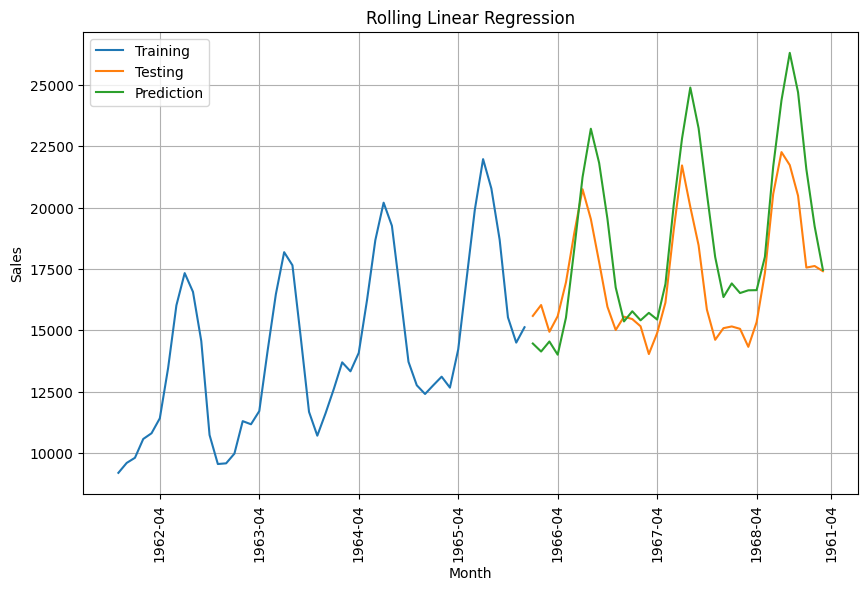

In [22]:
regr = LinearRegression()
regr.fit(x_train, y_train)

predictingset=[x for x in x_train[-1]]
y_pred=[]
for i in range(len(x_test)):
    pred=regr.predict([predictingset])
    y_pred.append(pred[0])
    predictingset.append(pred[0])
    predictingset=predictingset[1:]



plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Sales")

plt.plot(y_hat_rm['Month'][lag+1:-split_idx],y_train, label='Training')
plt.plot(y_hat_rm['Month'][-split_idx:],y_test, label='Testing')
plt.plot(y_hat_rm['Month'][-split_idx:],y_pred, label='Prediction')
plt.xticks(y_hat_rm['Month'][lag-6::12],  rotation='vertical')
plt.legend()
plt.title('Rolling Linear Regression')
plt.grid()
plt.show()

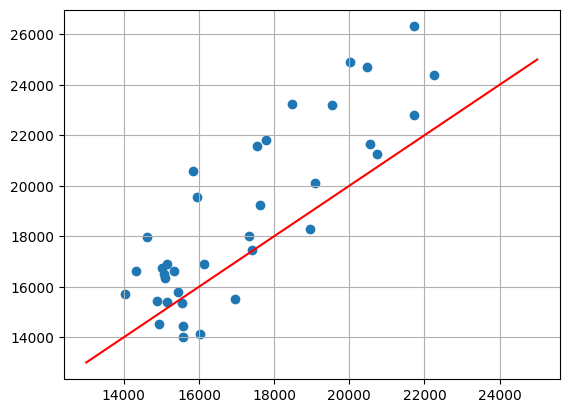

In [23]:
xv=np.linspace(13000,25000,1000)
plt.plot(xv,xv, 'r')

plt.scatter(y_test,y_pred)

plt.grid()
plt.show()

In [24]:
train=pd.DataFrame(data.iloc[:-split_idx,1])
test=pd.DataFrame(data.iloc[-split_idx :,1])
test.reset_index(inplace=True,drop=True)

In [25]:
result = adfuller(train)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("The data is not stationary.")
else:
    print("The data is stationary.")

ADF Statistic: 0.8598241317797489
p-value: 0.9925429701096811
The data is not stationary.


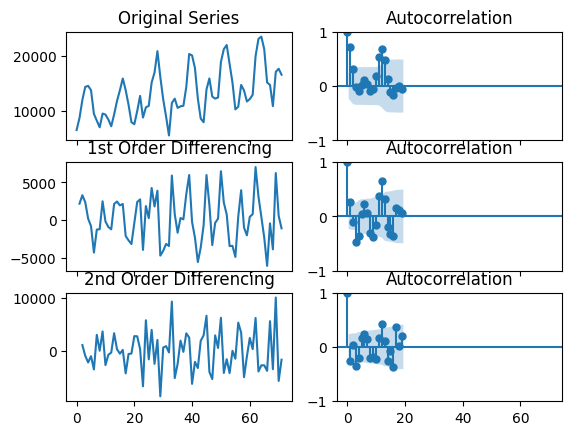

In [26]:
traindf=pd.DataFrame(train)

fig, ax = plt.subplots(3, 2, sharex=True)
ax[0, 0].plot(traindf); ax[0, 0].set_title('Original Series')
plot_acf(traindf, ax=ax[0, 1])

ax[1, 0].plot(traindf.diff()); ax[1, 0].set_title('1st Order Differencing')
plot_acf(traindf.diff().dropna(), ax=ax[1, 1])

ax[2, 0].plot(traindf.diff().diff()); ax[2, 0].set_title('2nd Order Differencing')
plot_acf(traindf.diff().diff().dropna(), ax=ax[2, 1])

plt.show()

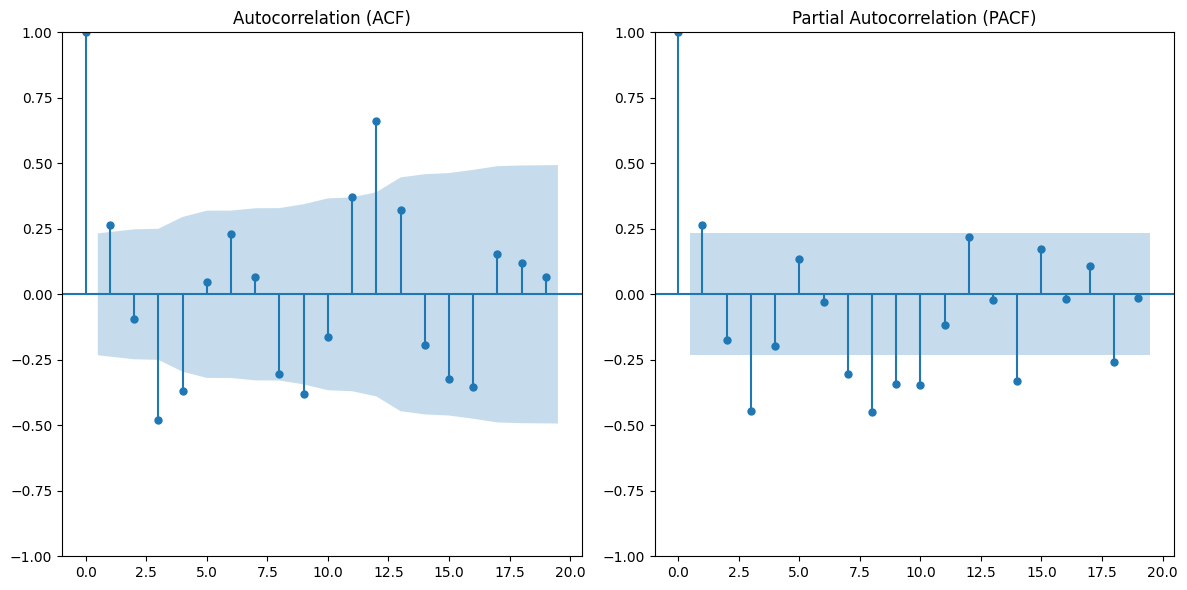

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(traindf.diff().dropna(), ax=plt.gca())
plt.title("Autocorrelation (ACF)")

plt.subplot(1, 2, 2)
plot_pacf(traindf.diff().dropna(), ax=plt.gca())
plt.title("Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()

In [28]:
model = ARIMA(train, seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:                    Sales   No. Observations:                   72
Model:             ARIMA(1, 1, [1], 12)   Log Likelihood                -532.057
Date:                  Mon, 29 Sep 2025   AIC                           1070.114
Time:                          22:53:26   BIC                           1076.397
Sample:                               0   HQIC                          1072.571
                                   - 72                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9993      0.019     51.363      0.000       0.961       1.037
ma.S.L12      -0.9840      0.222     -4.430      0.000      -1.419      -0.549
sigma2      2.702e+06   8.64e-08   3

In [29]:
history = [x for x in train['Sales']]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, seasonal_order=(1,1,1,12))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test.iloc[t][-1]
	history.append(obs)

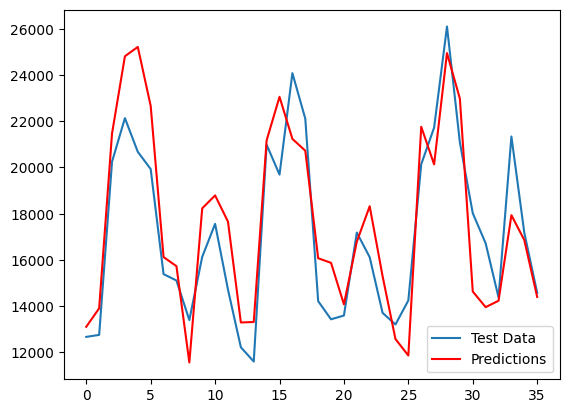

In [30]:
plt.plot(test, label='Test Data')
plt.plot(predictions, color='red', label='Predictions')
plt.legend()
plt.show()

In [31]:
print('Coefficient of determination: %.2f' % r2_score(test, predictions))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Coefficient of determination: 0.71
Test RMSE: 2018.215


In [32]:
model = ARIMA(train, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   72
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -659.634
Date:                Mon, 29 Sep 2025   AIC                           1327.269
Time:                        22:55:46   BIC                           1336.320
Sample:                             0   HQIC                          1330.868
                                 - 72                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0221      0.121      8.450      0.000       0.785       1.259
ar.L2         -0.4815      0.143     -3.374      0.001      -0.761      -0.202
ma.L1         -0.9044      0.075    -12.099      0.0

In [33]:
history = [x for x in train['Sales']]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test.iloc[t][-1]
	history.append(obs)

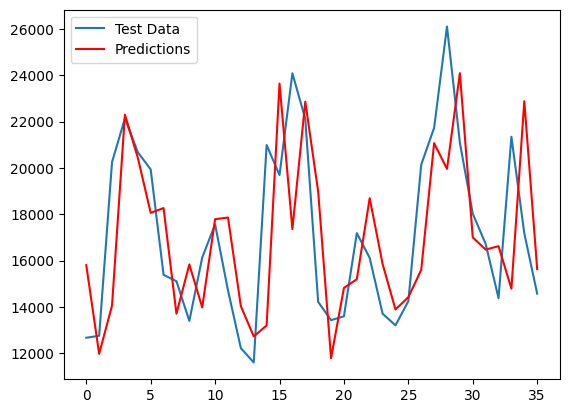

In [34]:
plt.plot(test, label='Test Data')
plt.plot(predictions, color='red', label='Predictions')
plt.legend()
plt.show()

In [35]:
print('Coefficient of determination: %.2f' % r2_score(test, predictions))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Coefficient of determination: 0.20
Test RMSE: 3342.478
